# Ensemble methods
## Introduction
Ensemble methods are a powerful class of machine learning techniques that involve combining the predictions from multiple models to improve the accuracy and robustness of predictions. These methods work on the principle that a group of weak learners can come together to form a strong learner, thereby achieving better performance than any individual model could alone.

### Types of Ensemble Methods
Ensemble methods can be broadly categorized into two types:

Bagging (Bootstrap Aggregating): This technique improves the stability and accuracy of machine learning algorithms by creating multiple subsets of the original dataset with replacement (bootstrapping), training a model on each subset, and then averaging the predictions. An example of a bagging method is the Random Forest algorithm, where many decision trees are trained on varied subsets of the data and their predictions are averaged.

Boosting: Boosting algorithms build a series of models in a sequential manner, where each subsequent model attempts to correct the errors of its predecessors. The predictions from all models are then combined through a weighted majority vote (or sum) to produce the final prediction. Common boosting algorithms include AdaBoost (Adaptive Boosting) and Gradient Boosting.

### Applications
Ensemble methods are employed in a variety of applications, from risk management and financial modeling to disease prediction and system security. They are particularly popular in competitions like Kaggle, where high accuracy is paramount and the data might include a wide range of influencing factors.

Ensemble learning represents a significant advance in the predictive capabilities of machine learning, providing tools that effectively address complex problems by combining the strengths of multiple models.

## Data Processing

In this analysis, I preprocess the Penguin dataset for machine learning. My approach involves:loading the data and removing rows with missing values,applying label encoding to categorical features like 'species', 'island', and 'sex’,separating the dataset into features and the target variable 'species', standardizing the features using StandardScaler, dividing the dataset into training and testing sets in a 70:30 ratio, maintaining consistency with a set random state.

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
# Load the Penguin dataset
penguin_data = sns.load_dataset("penguins")
penguin_data.dropna(inplace=True)

# Encode categorical features and labels
label_encoder = LabelEncoder()
for col in ['species', 'island', 'sex']:
    penguin_data[col] = label_encoder.fit_transform(penguin_data[col])

# Preprocess the data
X = penguin_data.drop('species', axis=1).values
y = penguin_data['species'].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## Ensemble Learning Methods for Penguin Species Classification
For each classifier, I train the model using the training set and then make predictions on the test set. The performance of each model is evaluated using the classification report, which includes key metrics such as precision, recall, and F1-score. This approach provides a comprehensive overview of how each ensemble method performs on the task of species classification.

In [3]:
# Bagging Classifier
bag_clf = BaggingClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, bag_y_pred))

# Random Forest Classifier
forest_clf = RandomForestClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, random_state=42)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, forest_y_pred))

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42), 
    n_estimators=10,
    algorithm="SAMME.R",
    learning_rate=0.5
)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

#Make predictions and print classified reports
y_pred = ada_clf.predict(X_test)
print("AdaBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred))


Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       

## Visualizing Decision Regions of Ensemble Classifiers
In this section, I explore the decision-making processes of three ensemble classifiers—Bagging, Random Forest, and AdaBoost—on the Penguin dataset. My approach includes selecting 'bill_length_mm' and 'bill_depth_mm' as key features, standardizing them for uniformity, and splitting the data into a 70:30 training-test ratio. Each classifier is then trained: a Bagging Classifier with 500 estimators, a Random Forest Classifier with 500 trees, and an AdaBoost Classifier with a Decision Tree base. Finally, I visualize their decision regions to compare how they categorize species based on these features, offering insights into their classification strategies in a two-dimensional feature space.

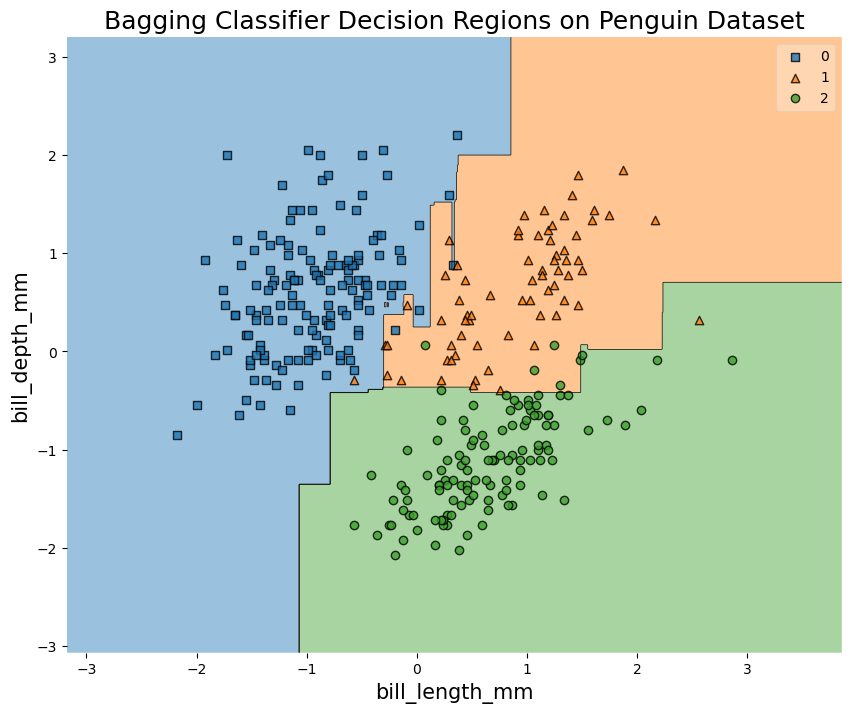

In [4]:

feature_names = ['bill_length_mm', 'bill_depth_mm']
X = penguin_data[feature_names].values
y = penguin_data['species'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Bagging classifier
bag_clf = BaggingClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

# Plot decision region
plt.figure(figsize=(10, 8))
plot_decision_regions(X_scaled, y, clf=bag_clf)
plt.xlabel(feature_names[0], fontsize=15)
plt.ylabel(feature_names[1], fontsize=15)
plt.title('Bagging Classifier Decision Regions on Penguin Dataset', fontsize=18)
plt.show()

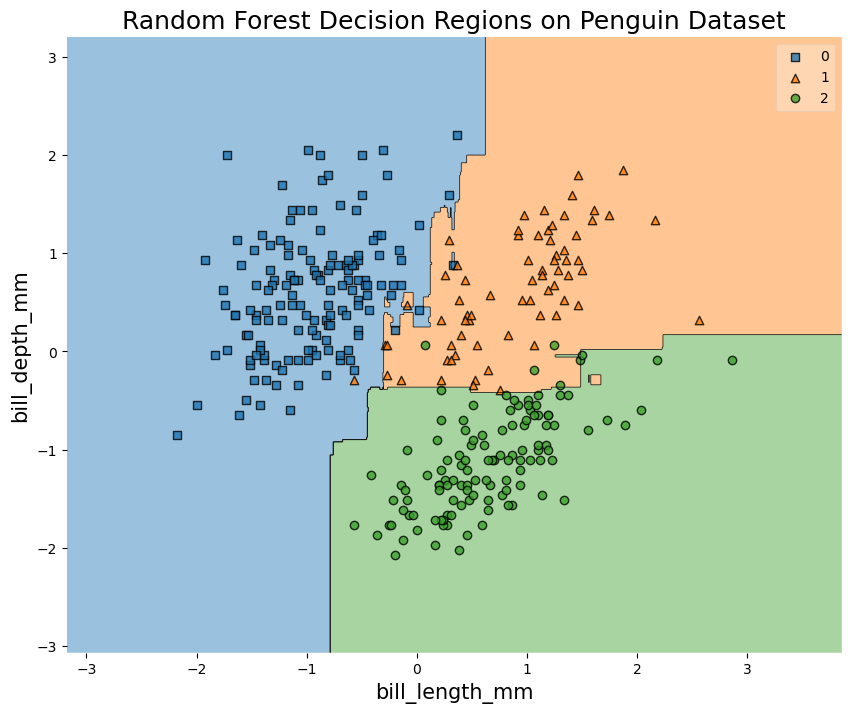

In [15]:
feature_names = ['bill_length_mm', 'bill_depth_mm']
X = penguin_data[feature_names]
y = penguin_data['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the Random Forest classifier
forest_clf = RandomForestClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, random_state=42)
forest_clf.fit(X_train, y_train)

# Plot decision region
plt.figure(figsize=(10, 8))
plot_decision_regions(X_scaled, y.to_numpy(), clf=forest_clf)
plt.xlabel(feature_names[0], fontsize=15)
plt.ylabel(feature_names[1], fontsize=15)
plt.title('Random Forest Decision Regions on Penguin Dataset', fontsize=18)
plt.show()

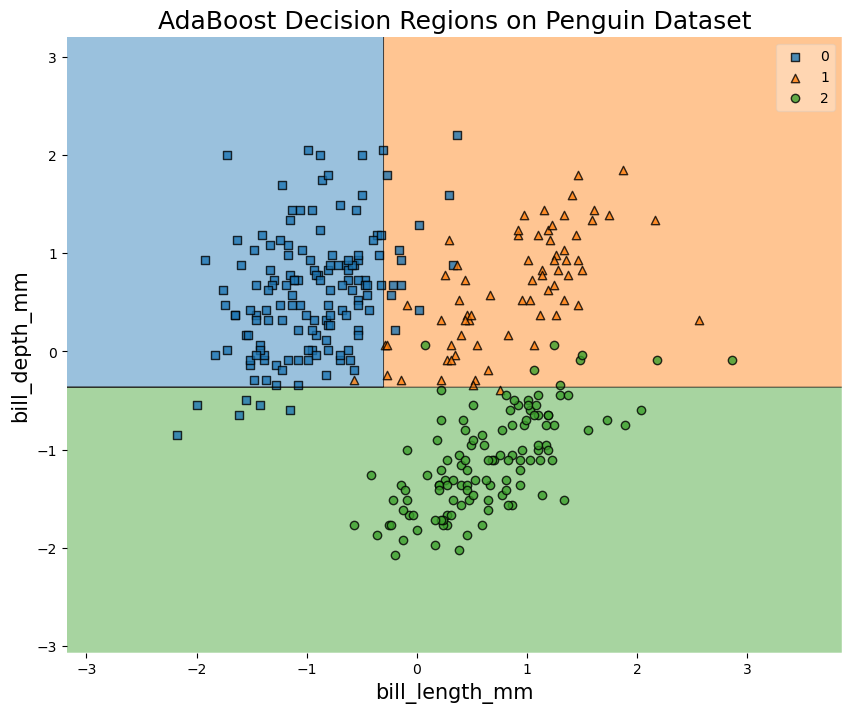

In [16]:
feature_names = ['bill_length_mm', 'bill_depth_mm']
X = penguin_data[feature_names]
y = penguin_data['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the AdaBoost classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42), 
    n_estimators=10,
    algorithm="SAMME.R",
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

# Plot decision region
plt.figure(figsize=(10, 8))
plot_decision_regions(X_scaled, y.to_numpy(), clf=ada_clf)
plt.xlabel(feature_names[0], fontsize=15)
plt.ylabel(feature_names[1], fontsize=15)
plt.title('AdaBoost Decision Regions on Penguin Dataset', fontsize=18)
plt.show()

## Conclusion
Each classifier has achieved high precision, recall, and F1-scores, indicating excellent classification ability.Despite some overlap, decision boundaries in the plots show that all models effectively separate the classes, especially class 2, which consistently shows a distinct region across all models.Bagging and Random Forest classifiers have similar complex decision boundaries, while AdaBoost shows simpler boundaries, reflecting its different approach to learning and error correction.